Matplotlib was initially designed with only two-dimensional plotting in mind. Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib’s two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization. We enable three-dimensional plots by importing the <b>mplot3d</b> toolkit, included with the main Matplotlib installatio

In [2]:
from mpl_toolkits import mplot3d

Once this submodule is imported, we can create a three-dimensional axes by passing the keyword projection='3d' to any of the normal axes creation routines

In [3]:
import numpy as np
import matplotlib.pyplot as plt

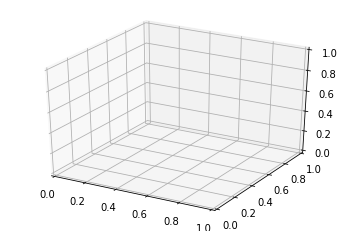

In [4]:
fig=plt.figure()
ax=plt.axes(projection='3d')

## Three dimensional points and line
The most basic three-dimensional plot is a line or scatter plot created from sets of (x, y, z) triples. In analogy with the more common two-dimensional plots discussed earlier, we can create these using the ax.plot3D and ax.scatter3D functions. The call signature for these is nearly identical to that of their two-dimensional counterparts

Here we’ll plot a trigonometric spiral, along with some points drawn randomly near the line

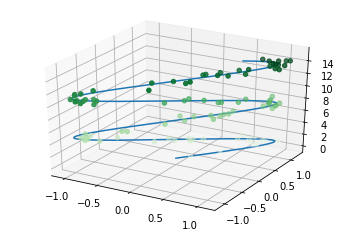

In [13]:
ax=plt.axes(projection='3d')

# Data for a 3D line
zline=np.linspace(0,15,1000)
xline=np.sin(zline)
yline=np.sin(zline)

ax.plot3D(xline,yline,zline)

# Data for 3D scattered points
zdata=15 * np.random.random(100)
xdata=np.sin(zdata)+0.1 * np.random.randn(100)
ydata=np.sin(zdata)+0.1 * np.random.randn(100)

ax.scatter3D(xdata,ydata,zdata,c=zdata,cmap='Greens')

## 3D Counter plots 
 mplot3d contains tools to create three-dimensional relief plots using the same inputs. Like two-dimensional ax.contour plots, ax.contour3D requires all the input data to be in the form of two-dimensional regular grids, with the Z data evaluated at each point. Here we’ll show a three-dimensional contour diagram of a threedimensional sinusoidal function 

In [25]:
def f(x,y):
    return np.sin(np.sqrt(x **2 +y ** 2))
x=np.linspace(-6,6,30)
y=np.linspace(-6,6,30)

X,Y = np.meshgrid(x,y)
Z=f(X,Y)

Text(0.5, 0, 'z')

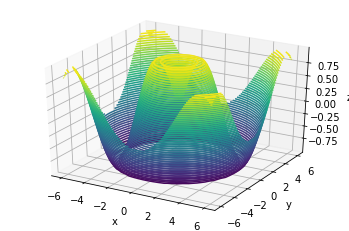

In [29]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(X,Y,Z,50) # cmap='binary'
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

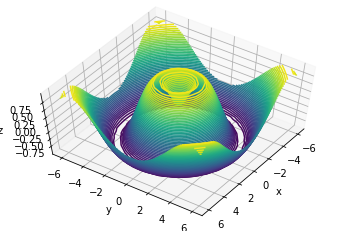

In [36]:
ax.view_init(60,35)
fig

Sometimes the default viewing angle is not optimal, in which case we can use the view_init method to set the elevation and azimuthal angles. we’ll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis)

note that we can accomplish this type of rotation interactively by clicking and dragging when using one of Matplotlib’s interactive backends

## Wireframe and surface plots

Two other types of three-dimensional plots that work on gridded data are wireframes and surface plots. These take a grid of values and project it onto the specified threedimensional surface, and can make the resulting three-dimensional forms quite easy to visualize

Text(0.5, 0.92, 'wireframe')

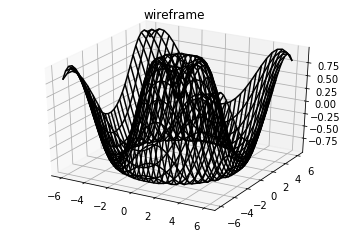

In [39]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z,color='black')
ax.set_title('wireframe')

A surface plot is like a wireframe plot, but each face of the wireframe is a filled polygon. Adding a colormap to the filled polygons can aid perception of the topology of the surface being visualize

Text(0.5, 0.92, 'surface')

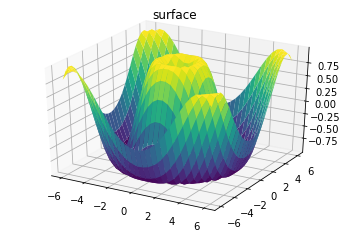

In [43]:
ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,
               cmap='viridis',edgecolor='none')
ax.set_title('surface')

Note that though the grid of values for a surface plot needs to be two-dimensional, it need not be rectilinear. Here is an example of creating a partial polar grid, which when used with the surface3D plot can give us a slice into the function we’re visualizing

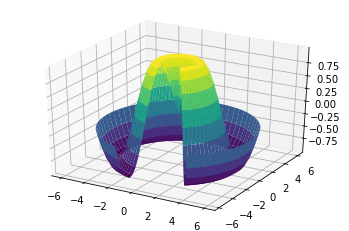

In [54]:
# polar surface plot
r=np.linspace(0,6,20)
theta=np.linspace(-0.9 * np.pi,0.8 * np.pi,60)
r,theta=np.meshgrid(r,theta)

X=r*np.sin(theta)
Y=r*np.cos(theta)
Z=f(X,Y)

ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,cmap='viridis',edgecolor='none',
               rstride=1,cstride=1)

# Surface Triangulations
For some applications, the evenly sampled grids required by the preceding routines are overly restrictive and inconvenient. In these situations, the triangulation-based plots can be very useful. What if rather than an even draw from a Cartesian or a polar grid, we instead have a set of random draws?

In [76]:
theta=2 * np.pi * np.random.random(1000)
r=6 * np.random.random(1000)
x=np.ravel(r* np.sin(theta))
y=np.ravel(r*np.cos(theta))
z=f(x,y)

3D sampled surface


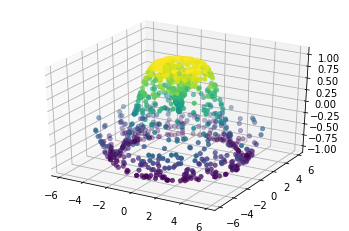

In [77]:
# we create a scatter plot of points to get an idea of surface
ax=plt.axes(projection='3d')
ax.scatter(x,y,z,c=z,cmap='viridis',linewidth=0.5)
print("3D sampled surface")

This leaves a lot to be desired. The function that will help us in this case is ax.plot_trisurf, which creates a surface by first finding a set of triangles formed between adjacent points 

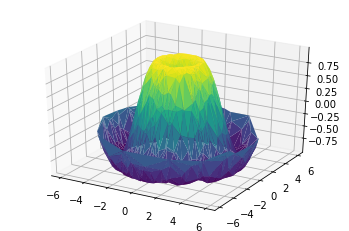

In [67]:
ax=plt.axes(projection='3d')
ax.plot_trisurf(x,y,z,cmap='viridis')

The result is certainly not as clean as when it is plotted with a grid, but the flexibility of such a triangulation allows for some really interesting three-dimensional plots. For example, it is actually possible to plot a three-dimensional Möbius strip using this

## Visualizing a Mobius strip
A Möbius strip is similar to a strip of paper glued into a loop with a half-twist. Topologically, it’s quite interesting because despite appearances it has only a single side! Here we will visualize such an object using Matplotlib’s three-dimensional tools. The key to creating the Möbius strip is to think about its parameterization: it’s a two dimensional strip, so we need two intrinsic dimensions. Let’s call them θ, which ranges from 0 to 2π around the loop, and w which ranges from –1 to 1 across the width of the strip 

In [68]:
theta=np.linspace(0,2*np.pi,30)
w=np.linspace(-0.25,0.25,8)
w,theta=np.meshgrid(w,theta)

Now from this parameterization, we must determine the (x, y, z) positions of the embedded strip. Thinking about it, we might realize that there are two rotations happening: one is the position of the loop about its center (what we’ve called θ), while the other is the twisting of the strip about its axis (we’ll call this ϕ). For a Möbius strip, we must have the strip make half a twist during a full loop, or Δϕ = Δθ/2.

In [69]:
phi=0.5 * theta

Now we use our recollection of trigonometry to derive the three-dimensional embedding. We’ll define r, the distance of each point from the center, and use this to find the embedded x,y,z coordinates:

In [70]:
#radious in x-y plane

r= 1+w* np.cos(phi)
x=np.ravel(r*np.cos(theta))
y=np.ravel(r*np.sin(theta))
z=np.ravel(w*np.sin(phi))

Finally, to plot the object, we must make sure the triangulation is correct. The best way to do this is to define the triangulation within the underlying parameterization, and then let Matplotlib project this triangulation into the three-dimensional space of the Möbius strip

(-1, 1)

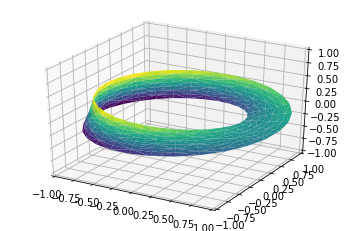

In [72]:
from matplotlib.tri import Triangulation
tri=Triangulation(np.ravel(w),np.ravel(theta))

ax=plt.axes(projection='3d')
ax.plot_trisurf(x,y,z,triangles=tri.triangles,cmap='viridis',linewidth=0.2)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
